In [5]:
!pip install -U scikit-fuzzy
import numpy as np
import skfuzzy as fuzz

# Define fuzzy sets for load dirtiness
vd = fuzz.trimf(np.arange(0, 11), [0, 0, 5])
md = fuzz.trimf(np.arange(0, 11), [0, 5, 10])
ld = fuzz.trimf(np.arange(0, 11), [5, 10, 10])
nd = fuzz.trimf(np.arange(0, 11), [0, 0, 0])

# Define fuzzy sets for load volume
fl = fuzz.trimf(np.arange(0, 11), [0, 0, 5])
ml = fuzz.trimf(np.arange(0, 11), [0, 5, 10])
ll = fuzz.trimf(np.arange(0, 11), [5, 10, 10])

# Define fuzzy sets for washing time
vlot = fuzz.trimf(np.arange(0, 11), [0, 0, 5])
lot = fuzz.trimf(np.arange(0, 11), [0, 5, 10])
mt = fuzz.trimf(np.arange(0, 11), [5, 7.5, 10])
lit = fuzz.trimf(np.arange(0, 11), [5, 10, 10])

# Define rules
rules = {
    "R1": np.fmin(vd, fl, vlot),
    "R2": np.fmin(md, fl, lot),
    "R3": np.fmin(ld, fl, lot),
    "R4": np.fmin(nd, fl, lit),
    "R5": np.fmin(vd, ml, vlot),
    "R6": np.fmin(md, ml, mt),
    "R7": np.fmin(ld, ml, mt),
    "R8": np.fmin(nd, ml, lit),
    "R9": np.fmin(vd, ll, lot),
    "R10": np.fmin(md, ll, lot),
    "R11": np.fmin(ld, ll, lit),
    "R12": np.fmin(nd, ll, lit),
}

# Create a fuzzy rule base
fuzzy_rule_base = rules["R1"]

# Create input variables for load dirtiness and load volume
load_dirtiness = 7.5
load_volume = 2.5

# Fuzzify inputs
fuzzified_load_dirtiness = fuzz.interp_membership(np.arange(0, 11), vd, load_dirtiness)+ fuzz.interp_membership(np.arange(0, 11), md, load_dirtiness)+ fuzz.interp_membership(np.arange(0, 11), ld, load_dirtiness)+ fuzz.interp_membership(np.arange(0, 11), nd, load_dirtiness)

fuzzified_load_volume = fuzz.interp_membership(np.arange(0, 11), fl, load_volume)+ fuzz.interp_membership(np.arange(0, 11), ml, load_volume)+ fuzz.interp_membership(np.arange(0, 11), ll, load_volume)

# Apply fuzzy rule base
active_rules = np.fmin(fuzzy_rule_base, np.fmin(fuzzified_load_dirtiness, fuzzified_load_volume))

# Defuzzify output variable for washing time
washing_time = fuzz.defuzz(np.arange(0, 11), active_rules,'centroid')

# Print the results
print(f"Fuzzified load dirtiness: {fuzzified_load_dirtiness}")
print(f"Fuzzified load volume: {fuzzified_load_volume}")
print(f"Active rules: {active_rules}")
print(f"Washing time: {washing_time}")
print(f"Load dirtiness: {load_dirtiness}")
print(f"Load volume: {load_volume}")
print(f"Washing time: {washing_time}")


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Fuzzified load dirtiness: 1.0
Fuzzified load volume: 1.0
Active rules: [0.  0.2 0.4 0.4 0.2 0.  0.  0.  0.  0.  0. ]
Washing time: 2.4999999999999996
Load dirtiness: 7.5
Load volume: 2.5
Washing time: 2.4999999999999996


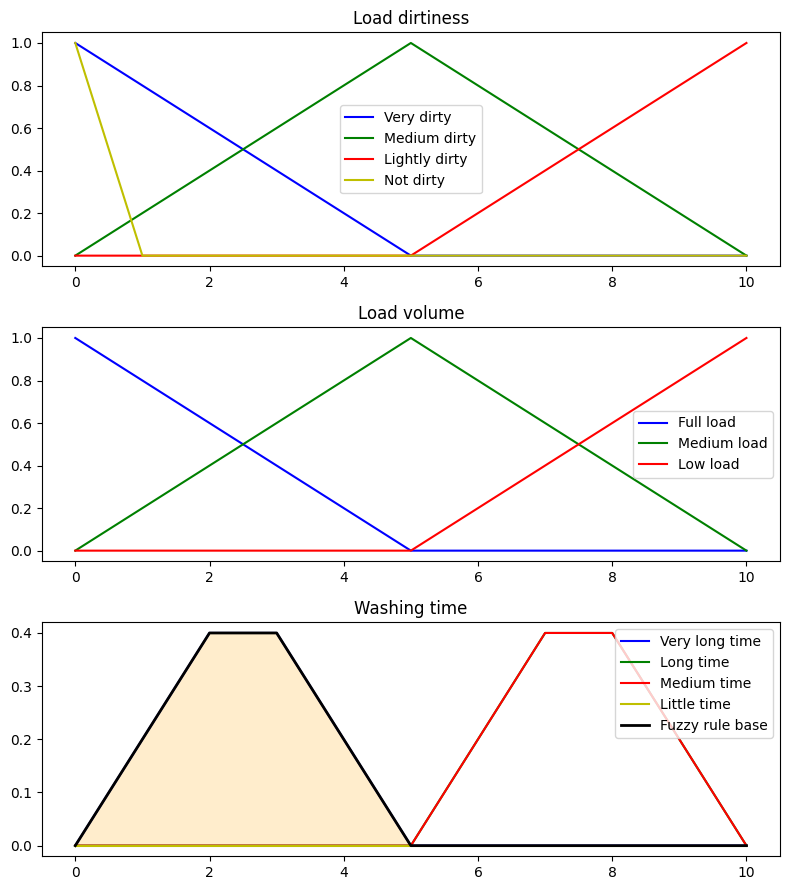

In [6]:
# Visualize fuzzy sets and rule base 

import matplotlib.pyplot as plt

fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))

ax0.plot(np.arange(0, 11), vd, 'b', linewidth=1.5, label='Very dirty')
ax0.plot(np.arange(0, 11), md, 'g', linewidth=1.5, label='Medium dirty')
ax0.plot(np.arange(0, 11), ld, 'r', linewidth=1.5, label='Lightly dirty')
ax0.plot(np.arange(0, 11), nd, 'y', linewidth=1.5, label='Not dirty')
ax0.set_title('Load dirtiness')
ax0.legend()

ax1.plot(np.arange(0, 11), fl, 'b', linewidth=1.5, label='Full load')
ax1.plot(np.arange(0, 11), ml, 'g', linewidth=1.5, label='Medium load')
ax1.plot(np.arange(0, 11), ll, 'r', linewidth=1.5, label='Low load')
ax1.set_title('Load volume')
ax1.legend()

ax2.plot(np.arange(0, 11), vlot, 'b', linewidth=1.5, label='Very long time')
ax2.plot(np.arange(0, 11), lot, 'g', linewidth=1.5, label='Long time')
ax2.plot(np.arange(0, 11), mt, 'r', linewidth=1.5, label='Medium time')
ax2.plot(np.arange(0, 11), lit, 'y', linewidth=1.5, label='Little time')
ax2.plot(np.arange(0, 11), fuzzy_rule_base, 'k', linewidth=2, label='Fuzzy rule base')
ax2.fill_between(np.arange(0, 11), fuzzy_rule_base, facecolor='Orange', alpha=0.2)
ax2.set_title('Washing time')
ax2.legend()

plt.tight_layout()
plt.show()






